DECODE11.0 MODEL BUILDING 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [2]:
df=pd.read_csv(r"H:\New folder (2)\train.csv")

In [3]:
df.head()

,ID,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [4]:
df.shape

(32724, 14)

In [5]:
df.describe()

,ID,age,education-num,capital-gain,capital-loss,hours-per-week
count,32724.000000,32724.000000,32724.000000,32724.000000,32724.000000,32724.000000
mean,16361.500000,38.574257,10.079941,1078.228792,87.700403,40.406216
std,9446.749441,13.712166,2.568684,7480.459910,401.872849,12.454379
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,8180.750000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,16361.500000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,24542.250000,48.000000,12.000000,0.000000,0.000000,45.000000
max,32723.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


Data Dictionary

1. Categorical Attributes

>workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
Individual work category

>marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
Individual marital status

>occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
Individual's occupation

>relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
Individual's relation in a family

>race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
Race of Individual

>sex: (categorical) Female, Male.

native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
Individual's native country

2. Continuous Attributes
>age: continuous.
Age of an individual

>education-num: number of education year, continuous.
Individual's year of receiving education

>capital-gain: continuous.
    
>capital-loss: continuous.
    
>hours-per-week: continuous.
Individual's working hour per week

 Data Cleaning
 
 Dealing with Missing Value

In [6]:
df.isnull().sum()

ID                   0
age                  0
workclass         1895
education-num        0
marital-status       0
occupation        1901
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     568
net-income           0
dtype: int64

Attributes workclass, occupation, and native-country most NAs. Let's drop these NA.

In [7]:
New_df = df.dropna()

In [8]:
New_df['prdclass'] = New_df['net-income']
del New_df['net-income']
New_df['education-num'] = New_df['education-num']
del New_df['education-num']

<ipython-input-8-743f48822c02>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['prdclass'] = New_df['net-income']
<ipython-input-8-743f48822c02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['education-num'] = New_df['education-num']


In [9]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30282 entries, 0 to 32723
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              30282 non-null  int64 
 1   age             30282 non-null  int64 
 2   workclass       30282 non-null  object
 3   marital-status  30282 non-null  object
 4   occupation      30282 non-null  object
 5   relationship    30282 non-null  object
 6   race            30282 non-null  object
 7   gender          30282 non-null  object
 8   capital-gain    30282 non-null  int64 
 9   capital-loss    30282 non-null  int64 
 10  hours-per-week  30282 non-null  int64 
 11  native-country  30282 non-null  object
 12  prdclass        30282 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [10]:
New_df.isnull().sum()

ID                0
age               0
workclass         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
prdclass          0
dtype: int64

## Feature Engineering


In [11]:
print(df['workclass'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['net-income'].unique())
print(df['marital-status'].unique())
print(df['gender'].unique())
print(df['native-country'].unique())
print(df['education-num'].unique())

['Self-emp-not-inc' nan 'Private' 'State-gov' 'Local-gov' 'Federal-gov'
 'Self-emp-inc' 'Never-worked' 'Without-pay']
['Exec-managerial' 'Sales' 'Craft-repair' nan 'Transport-moving'
 'Machine-op-inspct' 'Tech-support' 'Handlers-cleaners' 'Adm-clerical'
 'Prof-specialty' 'Other-service' 'Priv-house-serv' 'Protective-serv'
 'Farming-fishing' 'Armed-Forces']
['Husband' 'Own-child' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
['<=50K' '>50K']
['Married-civ-spouse' 'Divorced' 'Widowed' 'Never-married'
 'Married-spouse-absent' 'Separated' 'Married-AF-spouse']
['Male' 'Female']
['United-States' 'South' 'India' 'Mexico' 'Iran' 'Cuba' nan 'Vietnam'
 'England' 'Philippines' 'Laos' 'Canada' 'China' 'Poland' 'El-Salvador'
 'Dominican-Republic' 'Jamaica' 'Guatemala' 'Japan' 'Hong' 'Haiti'
 'Germany' 'France' 'Puerto-Rico' 'Trinadad&Tobago' 'Portugal'
 'Outlying-US(Guam-USVI-etc)' 'Ireland' 'Columbia' 'Ecuador' 'Nicaragua'
 'Taiwan' 'Hungary' 'Italy' 'Scotland' 'Thailand' 'Honduras' 'Cambod

In [12]:
#New_df.loc[df['prdclass'] == ' >50K', 'prdclass'] = 1
#New_df.loc[df['prdclass'] == ' <=50K', 'prdclass'] = 0

In [13]:
#prdclass1 = New_df[New_df['prdclass'] == 1]
#prdclass0 = New_df[New_df['prdclass'] == 0]

<AxesSubplot:xlabel='count', ylabel='prdclass'>

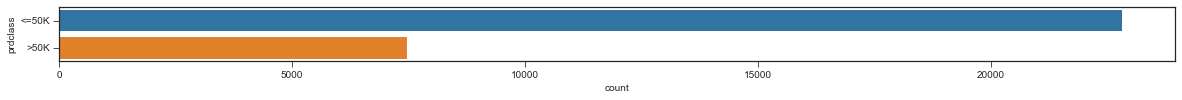

In [14]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="prdclass", data=New_df)

Income level less thann 50k is more than 3 time of those above 50k, The total amount of wealth are Skewed toward high income group

Marital-status

In [15]:
df2 = New_df['marital-status'].replace(' Never-married', 'NotMarried')
New_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
New_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
New_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
New_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
New_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
New_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
New_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

S:\Anaconda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


<AxesSubplot:xlabel='count', ylabel='marital-status'>

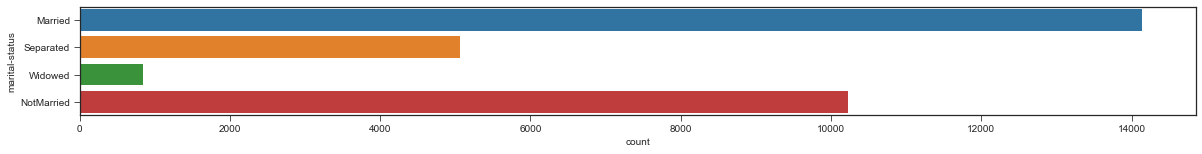

In [16]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=New_df)

Occupation

<AxesSubplot:xlabel='count', ylabel='occupation'>

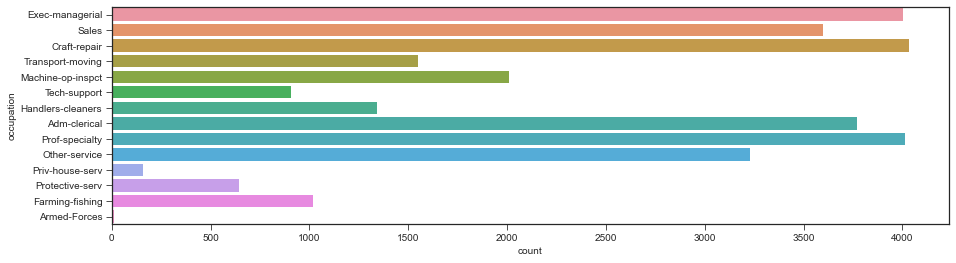

In [17]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(15,4)) 
sns.countplot(y="occupation", data=New_df)

Workclass

<AxesSubplot:xlabel='count', ylabel='workclass'>

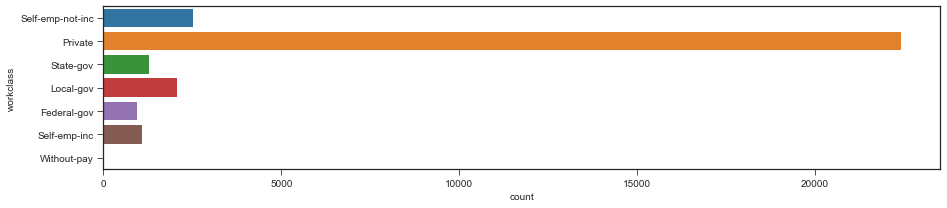

In [18]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(15,3)) 
sns.countplot(y="workclass", data=New_df)

age

In [19]:
# make the age variable discretized 
New_df['age_bin'] = pd.cut(New_df['age'], 20)

<ipython-input-19-783b67771631>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['age_bin'] = pd.cut(New_df['age'], 20)


S:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

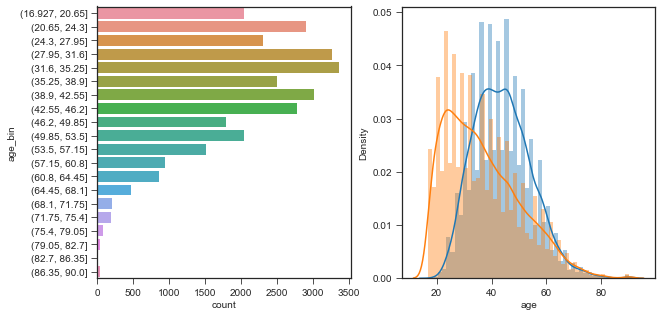

In [20]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(10,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=New_df)
plt.subplot(1, 2, 2)
sns.distplot(New_df[New_df['prdclass'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(New_df[New_df['prdclass'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

In [21]:
New_df[['prdclass', 'age']].groupby(['prdclass'], as_index=False).mean().sort_values(by='age', ascending=False)

,prdclass,age
1,>50K,43.967604
0,<=50K,36.674513


Race

<AxesSubplot:xlabel='race', ylabel='prop'>

<Figure size 720x1080 with 0 Axes>

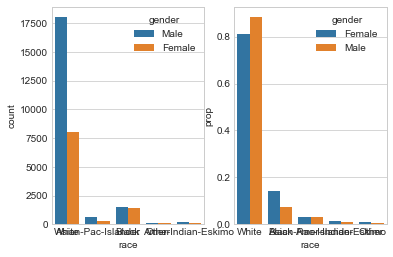

In [22]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(10,15)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=New_df, ax=axes[0])

prop_df = (New_df[x]
           .groupby(New_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

Hours of Work

In [23]:
# Heren I use the Pandas Cut function to bin the data in equally sized buckets
New_df['hours-per-week_bin'] = pd.cut(New_df['hours-per-week'], 10)
New_df['hours-per-week'] = New_df['hours-per-week']

<ipython-input-23-4e4b568de1f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['hours-per-week_bin'] = pd.cut(New_df['hours-per-week'], 10)
<ipython-input-23-4e4b568de1f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['hours-per-week'] = New_df['hours-per-week']


S:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

(20.0, 60.0)

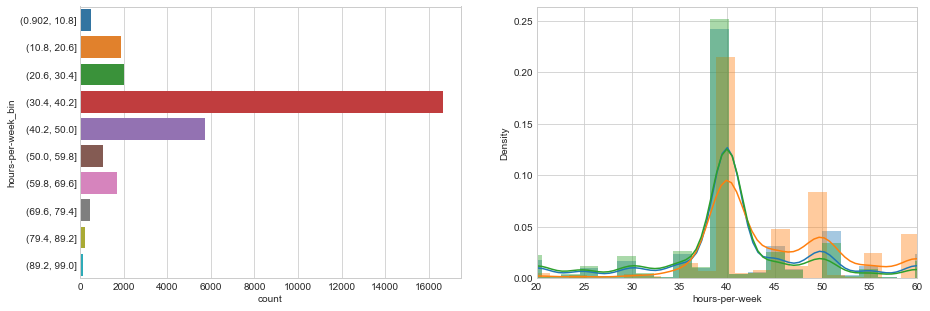

In [24]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=New_df);
plt.subplot(1, 2, 2)
sns.distplot(New_df['hours-per-week']);
sns.distplot(New_df[New_df['prdclass'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(New_df[New_df['prdclass'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

Age + hour of work (New Feature)

S:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
S:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

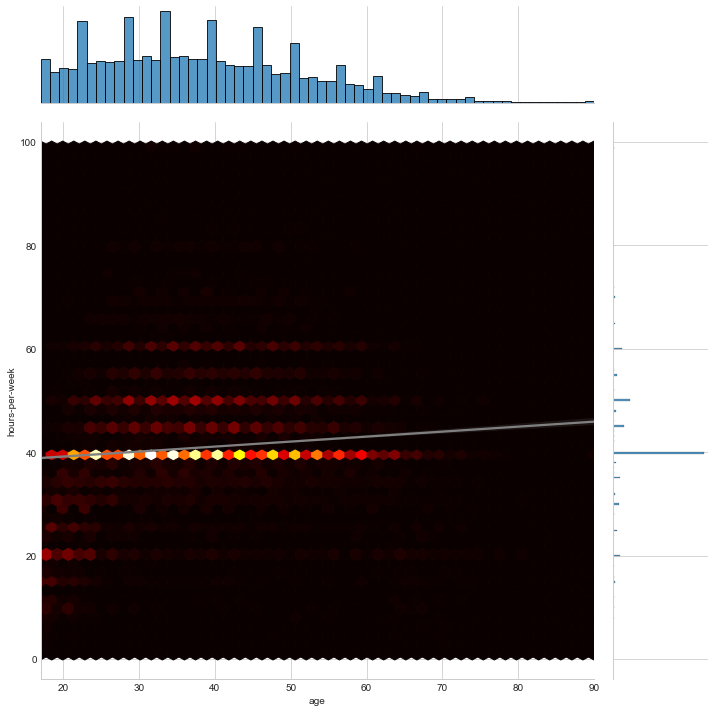

In [25]:
AW = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = New_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

sns.regplot(New_df.age, New_df['hours-per-week'], ax=AW.ax_joint, scatter=False, color='grey')


#cross Numerical Feature

In [26]:
New_df['age-hours'] = New_df['age']*New_df['hours-per-week']
New_df['age-hours_bin'] = pd.cut(New_df['age-hours'], 10)

<ipython-input-26-bbb745567303>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['age-hours'] = New_df['age']*New_df['hours-per-week']
<ipython-input-26-bbb745567303>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_df['age-hours_bin'] = pd.cut(New_df['age-hours'], 10)


S:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
S:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age-hours', ylabel='Density'>

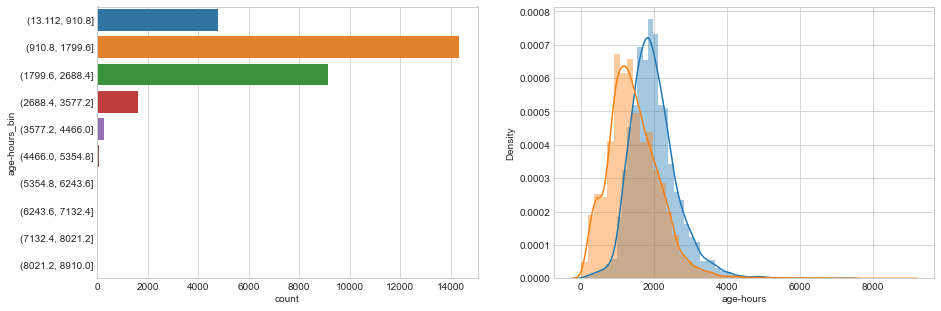

In [27]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(15,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=New_df);
plt.subplot(1, 2, 2)
sns.distplot(New_df[New_df['prdclass'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(New_df[New_df['prdclass'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})

EDA Part

Pair Plot

S:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


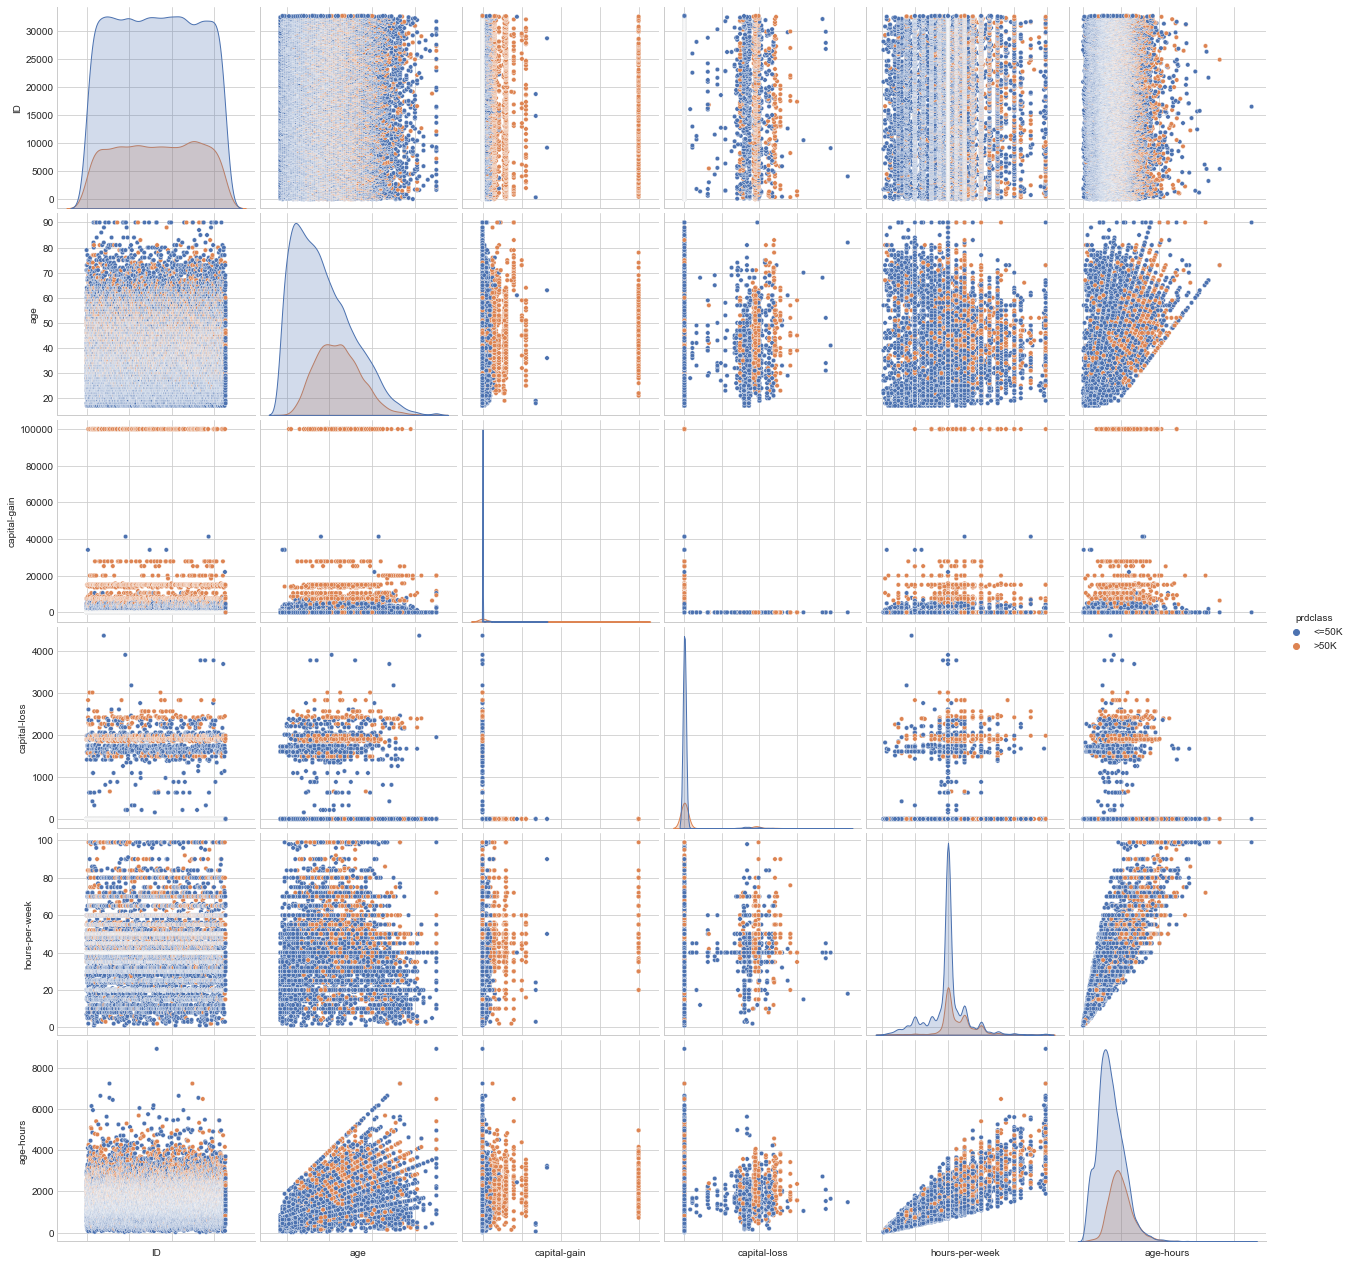

In [28]:
#pair plots of entire dataset
pp = sns.pairplot(New_df, hue = 'prdclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

Correlation Heatmap

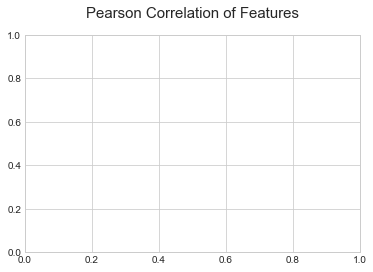

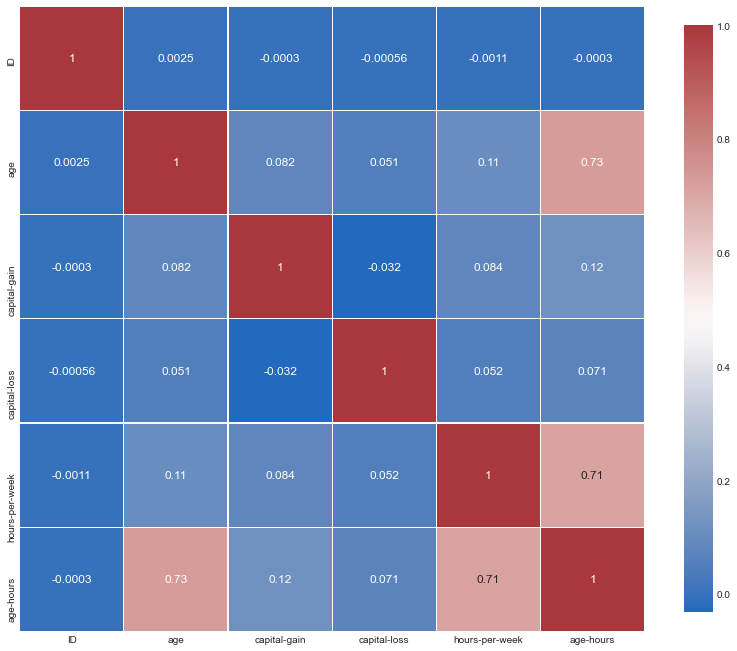

In [29]:
# correlation heatmap of Entire dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "vlag",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(New_df)
   

Bivariate Analysis

In [30]:
New_df.tail()

,ID,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,prdclass,age_bin,hours-per-week_bin,age-hours,age-hours_bin
32719,32719,56,Private,NotMarried,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K,"(53.5, 57.15]","(59.8, 69.6]",3696,"(3577.2, 4466.0]"
32720,32720,36,Private,Married,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K,"(35.25, 38.9]","(40.2, 50.0]",1620,"(910.8, 1799.6]"
32721,32721,32,Self-emp-not-inc,Married,Craft-repair,Husband,White,Male,0,0,32,United-States,<=50K,"(31.6, 35.25]","(30.4, 40.2]",1024,"(910.8, 1799.6]"
32722,32722,55,Private,Separated,Adm-clerical,Unmarried,White,Female,4650,0,20,United-States,<=50K,"(53.5, 57.15]","(10.8, 20.6]",1100,"(910.8, 1799.6]"
32723,32723,46,Private,Married,Exec-managerial,Husband,White,Male,0,1902,50,United-States,>50K,"(42.55, 46.2]","(40.2, 50.0]",2300,"(1799.6, 2688.4]"


<ipython-input-31-00413c385345>:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset = dataset.select_dtypes(include=[np.object])
<ipython-input-31-00413c385345>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if dataset.dtypes[column] == np.object:
<ipython-input-31-00413c385345>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Dep

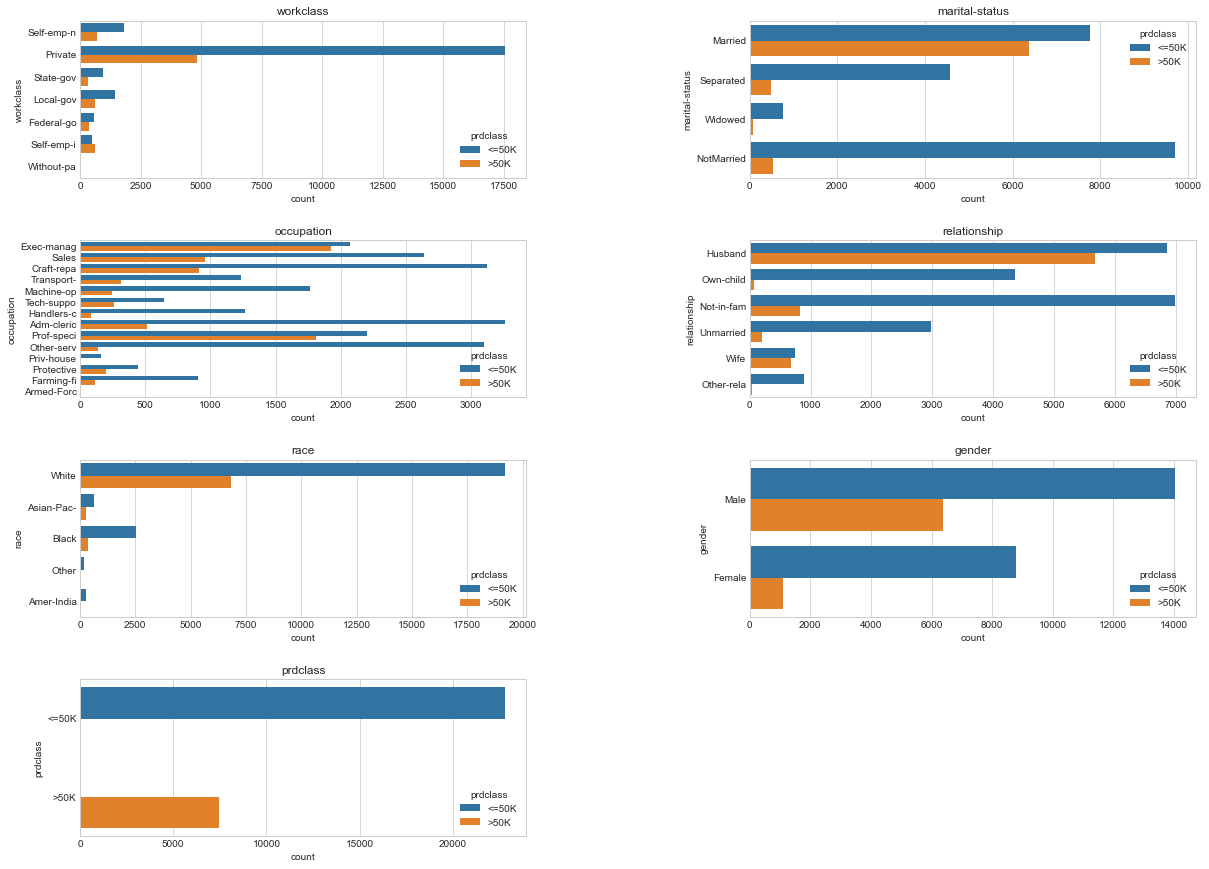

In [31]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = New_df.loc[:, ['workclass',
           'marital-status', 'occupation', 
           'relationship', 'race', 'gender','prdclass']]  

plot_bivariate_bar(bivariate_df, hue='prdclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

#Occupation vs. Income Level 

<AxesSubplot:xlabel='occupation', ylabel='age'>

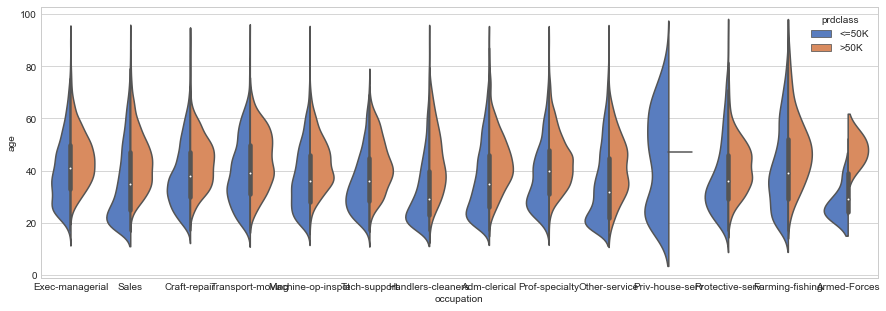

In [32]:
from matplotlib import pyplot
a4_dims = (15, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="prdclass",
                    data=New_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Voilinm plot show that senior worker have high salary.
Private house servise has the widezt range if age variation, but salary nor highrt than 50K.

#Race vs. Income Level

<AxesSubplot:xlabel='race', ylabel='age'>

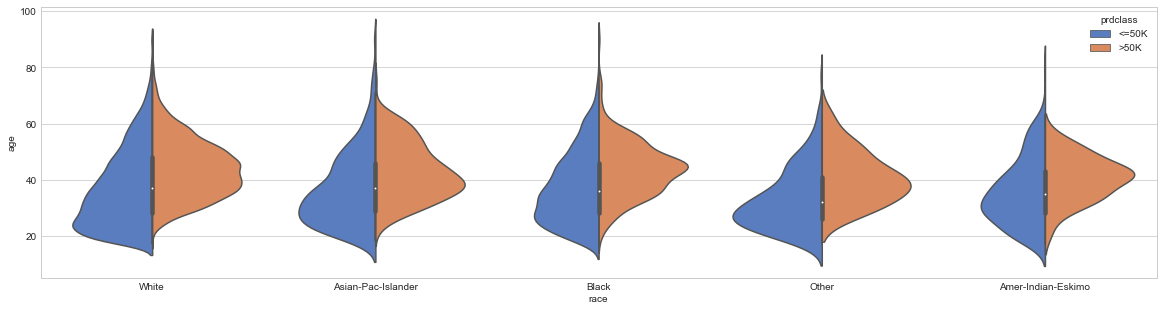

In [33]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="prdclass",
                    data=New_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

Building Machine Learning Models

In [34]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score


from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

 Feature Encoding

In [35]:
# Feature Selection and Encoding

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [36]:
New_df = New_df.apply(LabelEncoder().fit_transform)
New_df.head()

,ID,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,prdclass,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,0,43,4,0,3,0,4,1,0,0,47,38,0,11,4,977,3
1,1,11,4,0,11,3,1,1,0,0,62,34,0,3,6,655,1
2,2,54,4,2,2,1,4,0,0,0,27,38,0,14,2,727,2
4,3,33,2,0,2,0,4,1,0,49,49,38,1,9,4,885,2
5,4,18,2,0,11,0,4,1,91,0,47,38,1,4,4,628,1


 Train-test split

In [37]:
drop_elements = ['native-country', 'prdclass', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = New_df["prdclass"]
X = New_df.drop(drop_elements, axis=1)
X.head()

,ID,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,age-hours
0,0,43,4,0,3,0,4,1,0,0,47,977
1,1,11,4,0,11,3,1,1,0,0,62,655
2,2,54,4,2,2,1,4,0,0,0,27,727
4,3,33,2,0,2,0,4,1,0,49,49,885
5,4,18,2,0,11,0,4,1,91,0,47,628


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

 Principal Component Analysis (PCA)

In [39]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

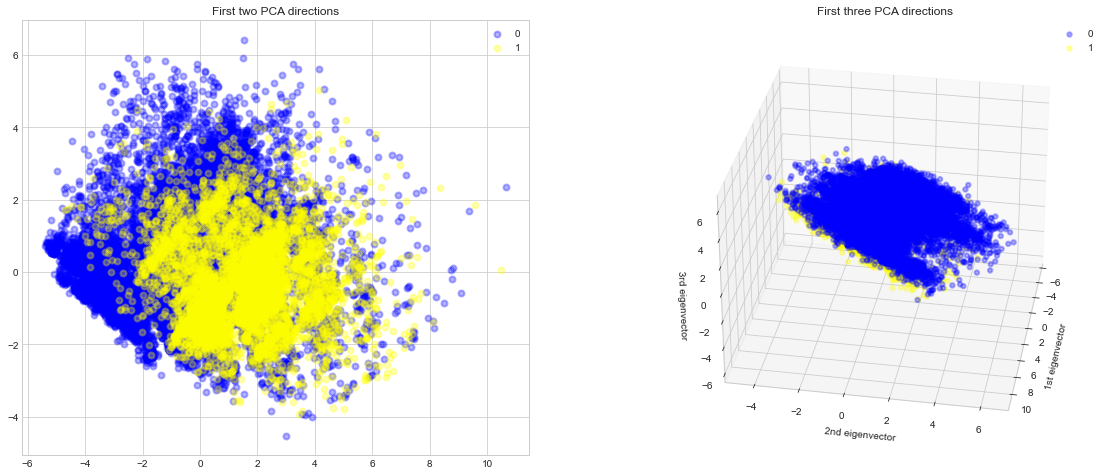

In [40]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(New_df.drop('prdclass', axis=1))
X = std_scale.transform(New_df.drop('prdclass', axis=1))
y = New_df['prdclass']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','Green']
lw = 2
alpha = 0.3
# 2 Components PCA

plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

In [41]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running


array([0.2279796 , 0.35450026, 0.44254881, 0.52705101, 0.61033196,
       0.69350643, 0.77230787, 0.84755141, 0.91917808, 0.96564487,
       0.99810116, 1.        ])

 Classification Models

Gaussian Naive Bayes

In [42]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.7990754498926862


#Linear Support Vector Machine

In [43]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.7511969621925045


Radical Support Vector Machine

In [44]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.7511969621925045


 Logistic Regression

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8005613339937263


S:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Random Forest

In [46]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.834736668317649


K-Nearest Neighbors

In [47]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.7436024434538551


IT is clearly see that Random Forest is Most accurate model.